In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_regression

In [6]:
X,Y = make_regression(n_samples=500, n_features=1, noise=20, bias=5)

(500,)

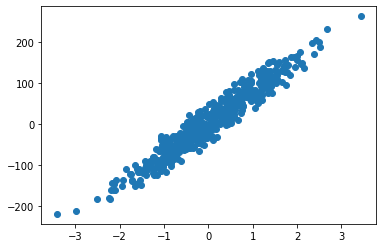

In [8]:
plt.scatter(X,Y)
X.shape
Y.shape

In [13]:
split=int(0.8*X.shape[0])
print(split)

X_train=X[:split]
X_test=X[split:]

Y_train=Y[:split]
Y_test=Y[split:]

print(X_train.shape)
print(X_test.shape)

print(Y_test.shape)


400
(400, 1)
(100, 1)
(100,)


In [14]:
def hypothesis(X,theta):
    return theta[0] + X*theta[1]

In [15]:
def get_error(X,Y,theta):
    error=0.0
    m=X.shape[0]
    
    for i in range(m):
        h=hypothesis(X[i],theta)
        error+=(Y[i]-h)**2
        
    error/= 2*m
    
    return error

In [16]:
def get_grad(X,Y,theta):
    grad=np.zeros((2,))
    
    m=X.shape[0]
    
    for i in range(m):
        h=hypothesis(X[i], theta)
        grad[0]+= (h-Y[i])
        grad[1]+=(h-Y[i])*(X[i])
        
    grad[0]/=m
    grad[1]/=m
    
    return grad

In [24]:
def gradient_descent(X,Y,learning_rate=0.01):
    error_list=[]
    theta= np.zeros((2,))
    
    
    max_iter=500
    for i in range(max_iter):
        g=get_grad(X,Y,theta)
        e=get_error(X,Y,theta)
        error_list.append(e)
        
        theta[0]-= learning_rate*g[0]
        theta[1]-= learning_rate*g[1]
        
    return theta, error_list


In [25]:
theta_final, errors=gradient_descent(X_train,Y_train)

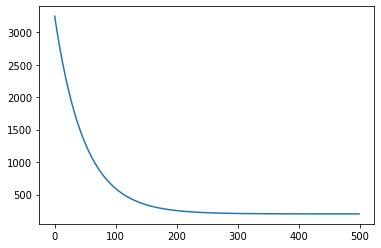

In [26]:
plt.plot(errors)
plt.show()



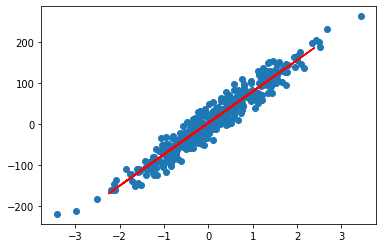

In [28]:
plt.scatter(X_train,Y_train)
plt.plot(X_test,hypothesis(X_test,theta_final), color='red')

In [32]:
plt.animation?

Object `plt.animation` not found.


In [42]:
from matplotlib.animation import FuncAnimation 

NameError: name 'init' is not defined

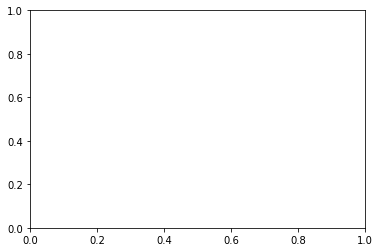

In [45]:
fig, ax=plt.subplots()
def FuncAnimation (i):
    line.set_data(X_test,hypothesis(X_test,theta_final), color='red')
    return line
anim =FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)
anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

hands on data

In [ ]:
import